In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from yellowbrick.cluster import SilhouetteVisualizer,KElbowVisualizer

### Problem Statement
Based on given data of visitors browsing for online shopping, build different clusters to know whether person is only browsing and visiting multiples pages or also generating revenue for the shopping websites as well. Analyse and compare the clusters formed with the existing Revenue Column.

In [2]:
df=pd.read_csv(r"C:\Users\Piyush mishra\Downloads\USL_Mini\USL_Mini\SET_B\online_shoppers_intention.csv")

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.shape  # shape of the data

(12330, 18)

In [5]:
df.info()  # info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.isnull().sum() # Checking for missing values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [8]:
df.describe(include=object).T

,count,unique,top,freq
Month,12330,10,May,3364
VisitorType,12330,3,Returning_Visitor,10551


## Univariate Analysis

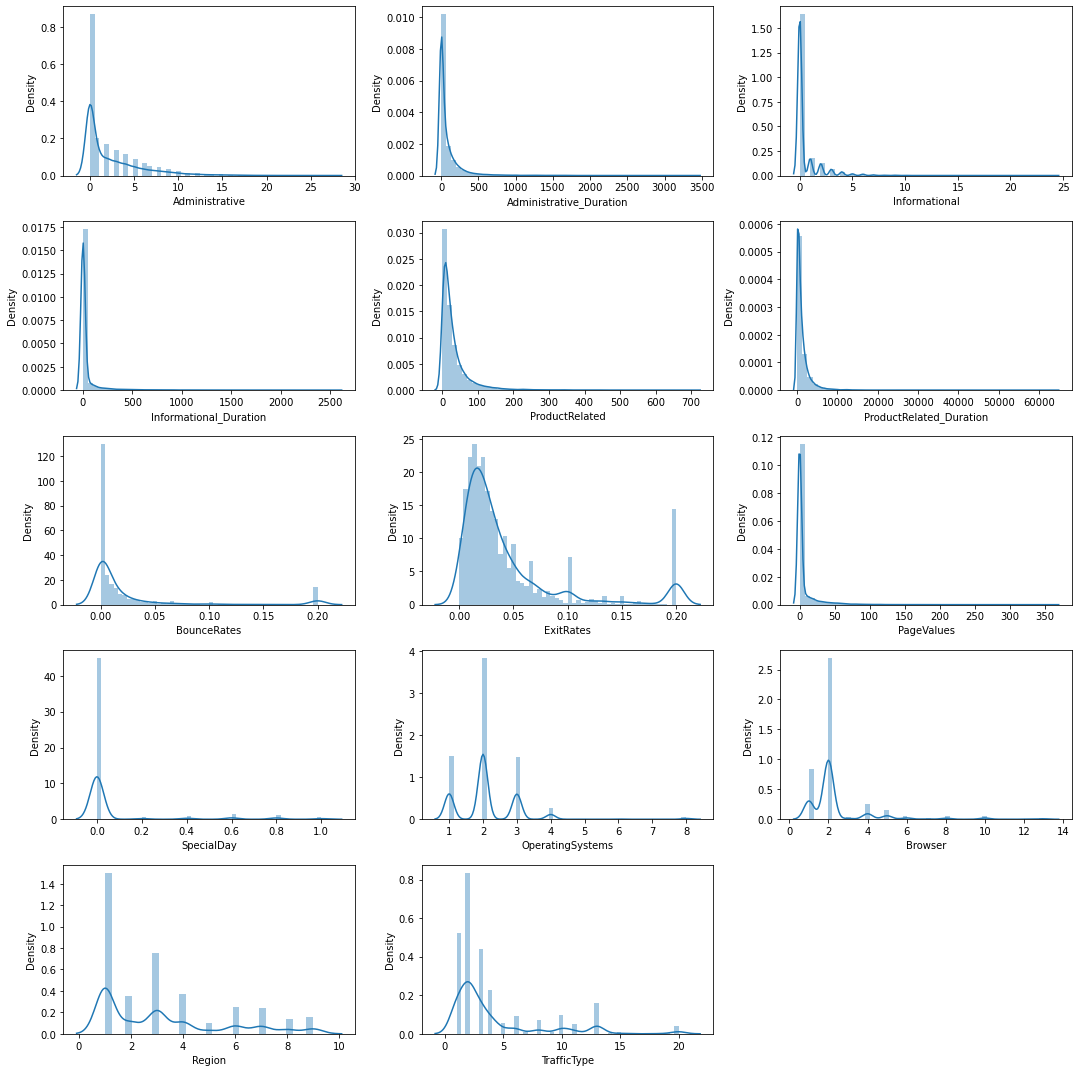

In [9]:
plt.rcParams['figure.figsize']=[15,15]
counter=1
for i in df.select_dtypes(include=np.number).columns:
    plt.subplot(5,3,counter)
    sns.distplot(df[i])
    counter+=1
plt.tight_layout()
plt.show()

In [10]:
# Most of the variables seems to be positively skewed in nature.
# Region and Traffic Type seems to be multimodal in nature.

In [11]:
df.skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

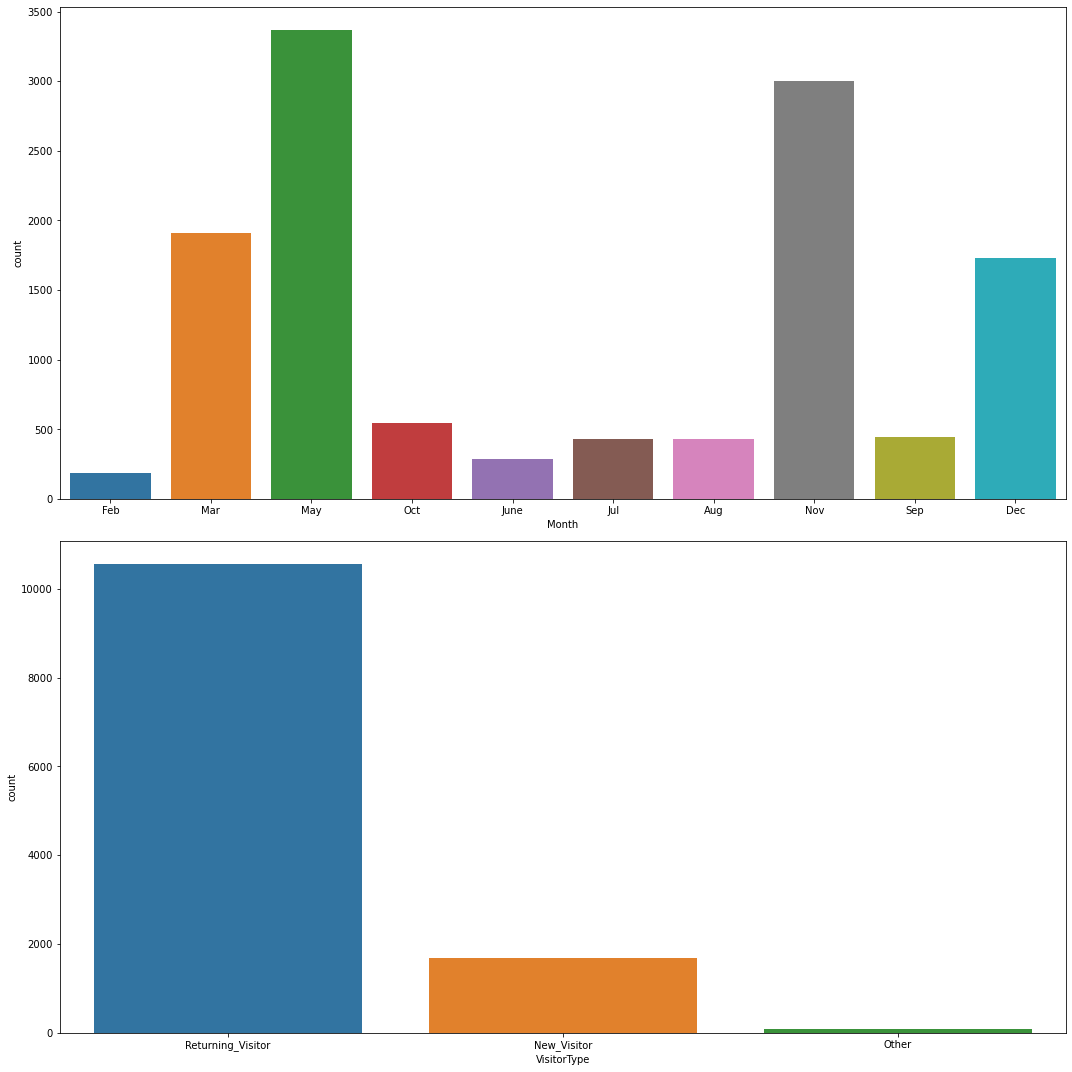

In [12]:
counter=1
for i in df.select_dtypes(include=object):
    plt.subplot(2,1,counter)
    sns.countplot(df[i])
    counter+=1
plt.tight_layout()
plt.show()

In [13]:
# The most appeared months are May and November.
# The count of May and November month is approximately same.
# The count of month March and December is also almost same.
# The  February month is appeared the least.
# The Returning Visitor appeared the most followed by New Visistor and then Other.

## Bivariate Analysis

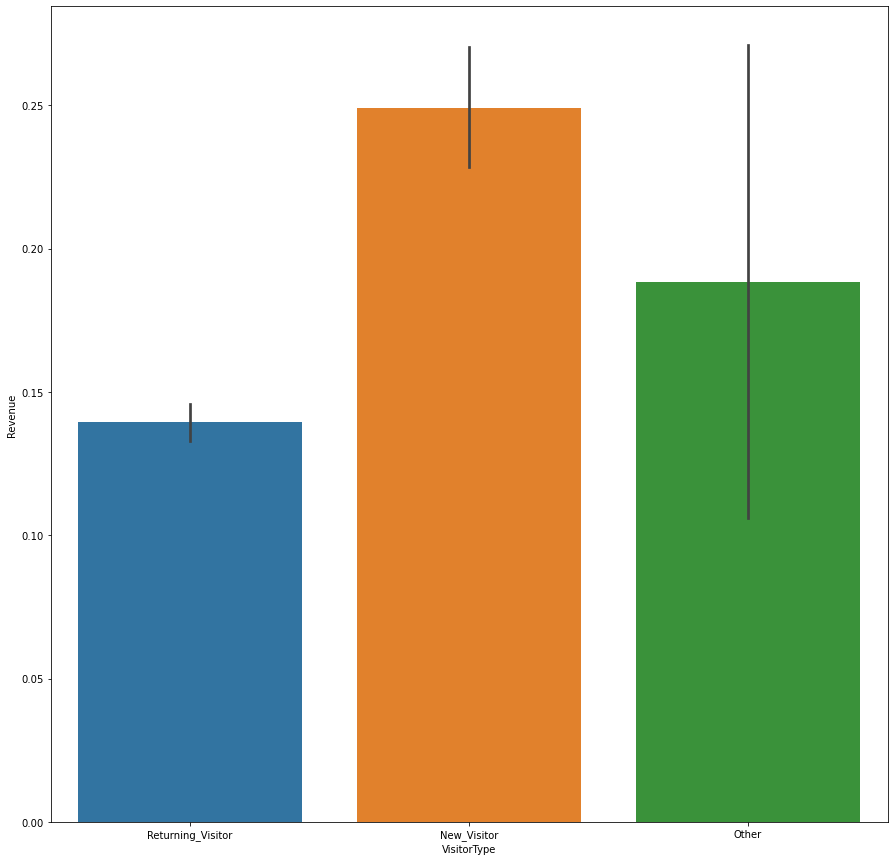

In [14]:
sns.barplot(df.VisitorType,df.Revenue)
plt.show()

In [15]:
# The New Visitor has the highest revenue followed by Others and then Returning Visitor.

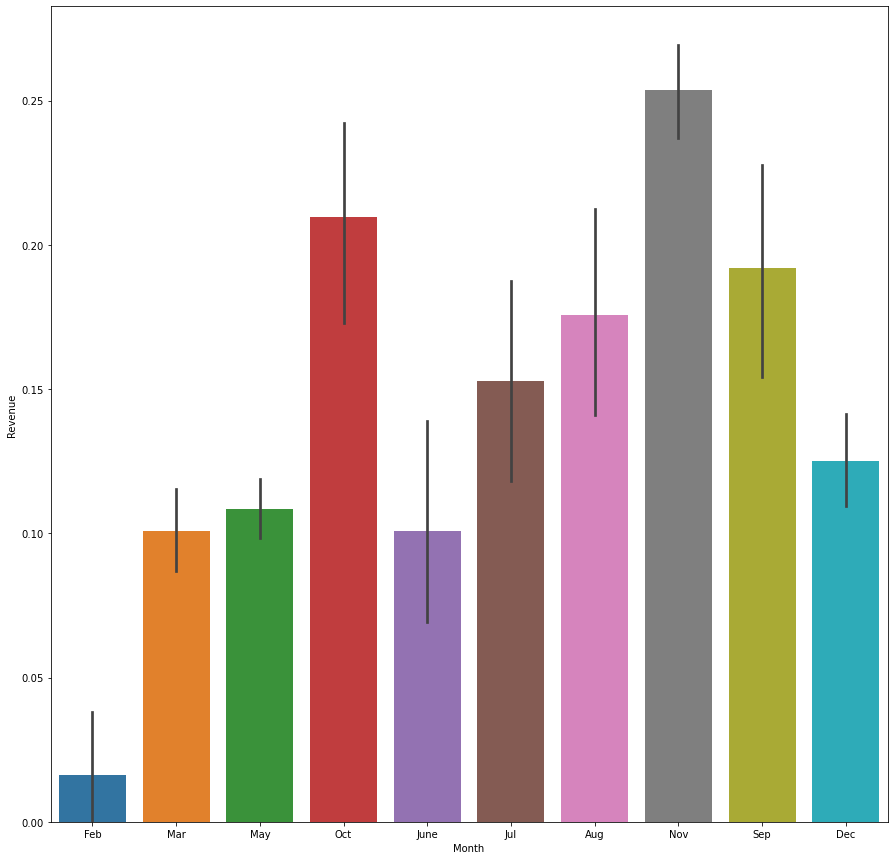

In [16]:
sns.barplot(df.Month,df.Revenue)
plt.show()

In [17]:
# The revenue of the November month is the highest
# The revenue of the February month is the least
# The revenue goes on increasing from February to November month and then decreases in the month of December.

## Missing Value Analysis

In [18]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [19]:
# There is no missing values in the data from the above analysis

## Outlier  Analysis and Treatment

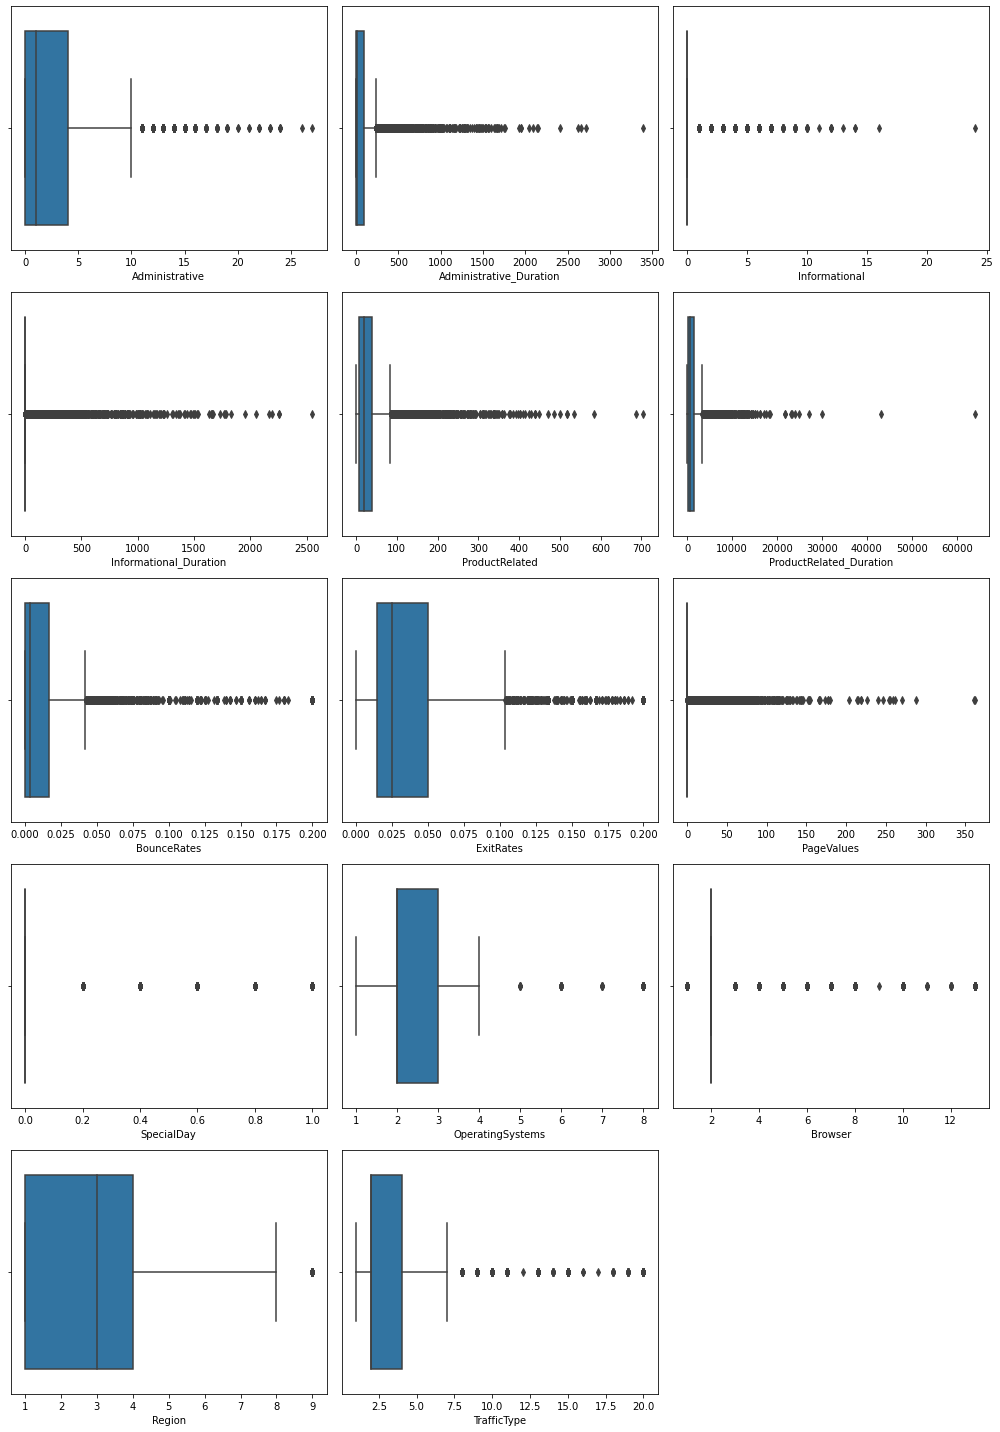

In [20]:
plt.rcParams['figure.figsize']=[14,20]
counter=1
for i in df.select_dtypes(include=np.number).columns:
    plt.subplot(5,3,counter)
    sns.boxplot(df[i])
    counter+=1
plt.tight_layout()
plt.show()

## Outlier Treatment

In [21]:
for i in df.select_dtypes(include=np.number).columns:
    Q1=np.quantile(df[i],0.25)
    Q3=np.quantile(df[i],0.75)
    IQR=Q3-Q1
    UL=Q3 + (1.5*IQR)
    LL=Q1 - (1.5*IQR)
    
    df.loc[df[i]>UL,i]=UL
    df.loc[df[i]<LL,i]=LL

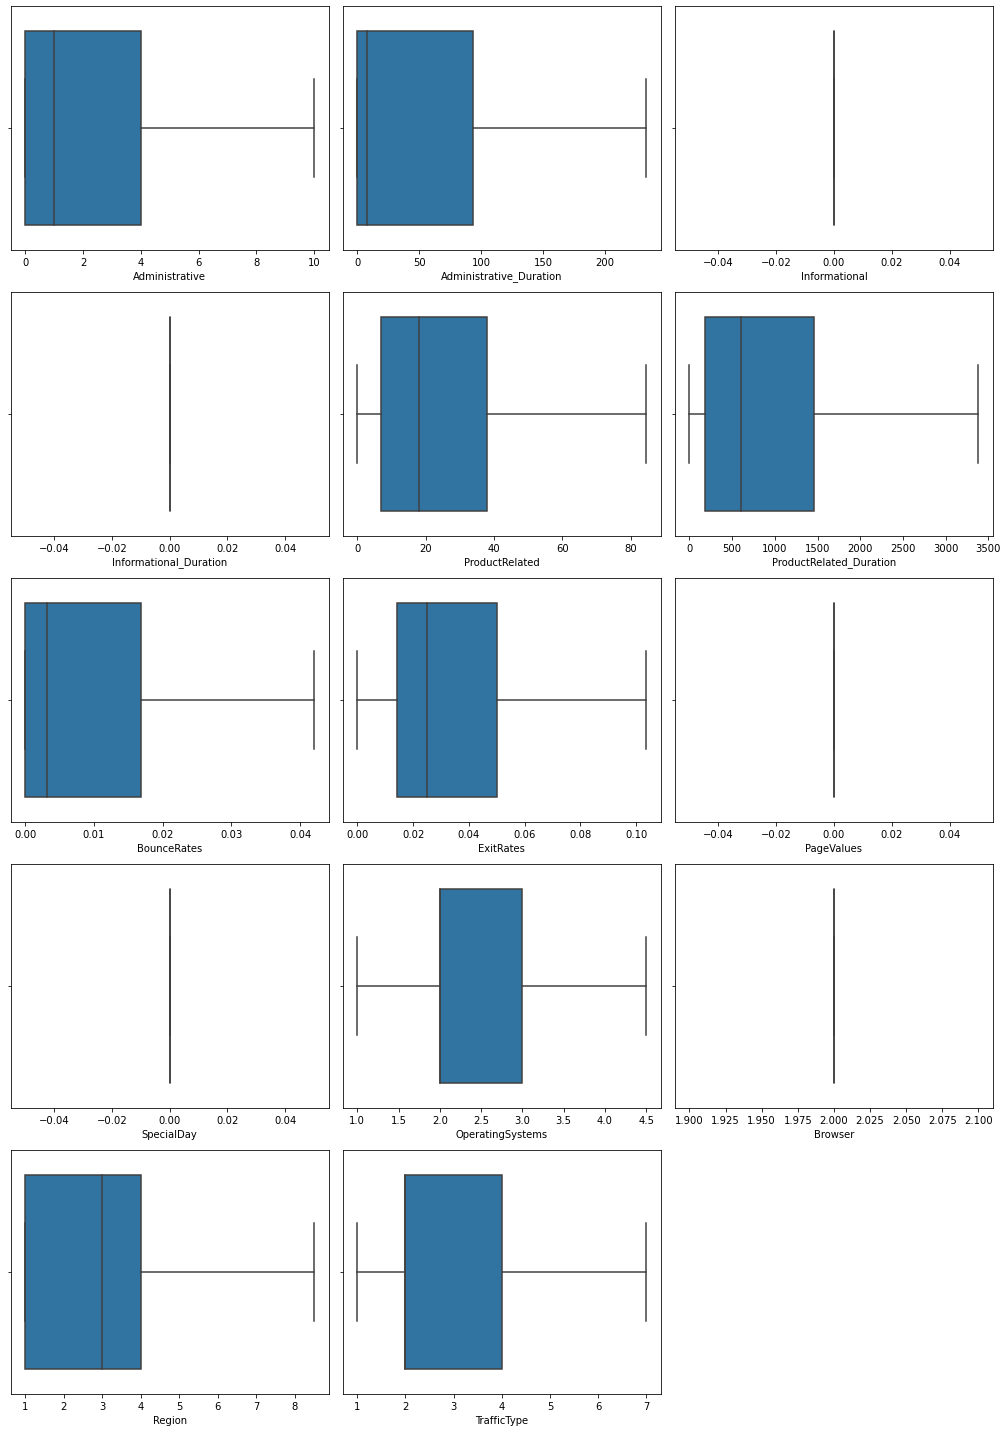

In [22]:
counter=1
for i in df.select_dtypes(include=np.number).columns:
    plt.subplot(5,3,counter)
    sns.boxplot(df[i])
    counter+=1
plt.tight_layout()
plt.show()

## Scaling of Data

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_arr=sc.fit_transform(df.select_dtypes(include=np.number))

In [24]:
df_s=pd.DataFrame(sc_arr,columns=df.select_dtypes(include=np.number).columns)

In [25]:
df_s.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,-0.751846,-0.718922,0.0,0.0,-1.021518,-0.958002,2.090999,2.199769,0.0,0.0,-1.395453,0.0,-0.903969,-1.064099
1,-0.751846,-0.718922,0.0,0.0,-0.981764,-0.896052,-0.734733,2.082720,0.0,0.0,-0.124094,0.0,-0.903969,-0.584028
2,-0.751846,-0.718922,0.0,0.0,-1.021518,-0.958002,2.090999,2.199769,0.0,0.0,2.418624,0.0,2.284045,-0.103957
3,-0.751846,-0.718922,0.0,0.0,-0.981764,-0.955421,2.090999,2.199769,0.0,0.0,1.147265,0.0,-0.478900,0.376114
4,-0.751846,-0.718922,0.0,0.0,-0.663735,-0.350594,0.609848,0.444034,0.0,0.0,1.147265,0.0,-0.903969,0.376114


In [26]:
cat=df.select_dtypes(include=object)
cat

,Month,VisitorType
0,Feb,Returning_Visitor
1,Feb,Returning_Visitor
2,Feb,Returning_Visitor
3,Feb,Returning_Visitor
4,Feb,Returning_Visitor
...,...,...
12325,Dec,Returning_Visitor
12326,Nov,Returning_Visitor
12327,Nov,Returning_Visitor
12328,Nov,Returning_Visitor


## Encoding of Categorical Variables

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat['Month']=le.fit_transform(cat['Month'])

In [28]:
le=LabelEncoder()
cat['VisitorType']=le.fit_transform(cat['VisitorType'])

In [29]:
cat.head()

,Month,VisitorType
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2


In [30]:
df_s=pd.concat([cat,df_s],axis=1)

In [31]:
df_s.head()

,Month,VisitorType,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,2,2,-0.751846,-0.718922,0.0,0.0,-1.021518,-0.958002,2.090999,2.199769,0.0,0.0,-1.395453,0.0,-0.903969,-1.064099
1,2,2,-0.751846,-0.718922,0.0,0.0,-0.981764,-0.896052,-0.734733,2.082720,0.0,0.0,-0.124094,0.0,-0.903969,-0.584028
2,2,2,-0.751846,-0.718922,0.0,0.0,-1.021518,-0.958002,2.090999,2.199769,0.0,0.0,2.418624,0.0,2.284045,-0.103957
3,2,2,-0.751846,-0.718922,0.0,0.0,-0.981764,-0.955421,2.090999,2.199769,0.0,0.0,1.147265,0.0,-0.478900,0.376114
4,2,2,-0.751846,-0.718922,0.0,0.0,-0.663735,-0.350594,0.609848,0.444034,0.0,0.0,1.147265,0.0,-0.903969,0.376114


In [32]:
Z=df.loc[:,['Weekend','Revenue']]

In [33]:
Z.head()

,Weekend,Revenue
0,False,False
1,False,False
2,False,False
3,False,False
4,True,False


In [34]:
le=LabelEncoder()
Z['Weekend']=le.fit_transform(Z['Weekend'])

In [35]:
le=LabelEncoder()
Z['Revenue']=le.fit_transform(Z['Revenue'])

In [36]:
Z.head()

,Weekend,Revenue
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


In [37]:
df_s=pd.concat([df_s,Z],axis=1)

In [38]:
df_s.head()

,Month,VisitorType,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
0,2,2,-0.751846,-0.718922,0.0,0.0,-1.021518,-0.958002,2.090999,2.199769,0.0,0.0,-1.395453,0.0,-0.903969,-1.064099,0,0
1,2,2,-0.751846,-0.718922,0.0,0.0,-0.981764,-0.896052,-0.734733,2.082720,0.0,0.0,-0.124094,0.0,-0.903969,-0.584028,0,0
2,2,2,-0.751846,-0.718922,0.0,0.0,-1.021518,-0.958002,2.090999,2.199769,0.0,0.0,2.418624,0.0,2.284045,-0.103957,0,0
3,2,2,-0.751846,-0.718922,0.0,0.0,-0.981764,-0.955421,2.090999,2.199769,0.0,0.0,1.147265,0.0,-0.478900,0.376114,0,0
4,2,2,-0.751846,-0.718922,0.0,0.0,-0.663735,-0.350594,0.609848,0.444034,0.0,0.0,1.147265,0.0,-0.903969,0.376114,1,0


In [39]:
final_data=df_s.drop('Revenue',axis=1)

In [40]:
final_data.head()

,Month,VisitorType,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
0,2,2,-0.751846,-0.718922,0.0,0.0,-1.021518,-0.958002,2.090999,2.199769,0.0,0.0,-1.395453,0.0,-0.903969,-1.064099,0
1,2,2,-0.751846,-0.718922,0.0,0.0,-0.981764,-0.896052,-0.734733,2.082720,0.0,0.0,-0.124094,0.0,-0.903969,-0.584028,0
2,2,2,-0.751846,-0.718922,0.0,0.0,-1.021518,-0.958002,2.090999,2.199769,0.0,0.0,2.418624,0.0,2.284045,-0.103957,0
3,2,2,-0.751846,-0.718922,0.0,0.0,-0.981764,-0.955421,2.090999,2.199769,0.0,0.0,1.147265,0.0,-0.478900,0.376114,0
4,2,2,-0.751846,-0.718922,0.0,0.0,-0.663735,-0.350594,0.609848,0.444034,0.0,0.0,1.147265,0.0,-0.903969,0.376114,1


## Clustering

## KMeans Clustering

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [42]:
n_clus=[2,3,4,5,6,7,8,9,10]
wcss=[]
sil_scr=[]
for i in n_clus:
    model=KMeans(n_clusters=i)
    pred=model.fit_predict(final_data)
    sil_scr.append(silhouette_score(final_data,pred))
    wcss.append(model.inertia_)

In [43]:
pd.DataFrame({'WCSS':wcss,'Silhouette Score':sil_scr},index=n_clus)

,WCSS,Silhouette Score
2,132527.399860,0.330480
3,111589.739267,0.221468
4,99336.337356,0.210137
5,93663.611081,0.199578
6,88547.654791,0.176018
7,84548.048461,0.166889
8,80901.016969,0.164796
9,77565.868240,0.165283
10,74712.686338,0.162149


## Elbow Plot

Text(0, 0.5, 'wcss')

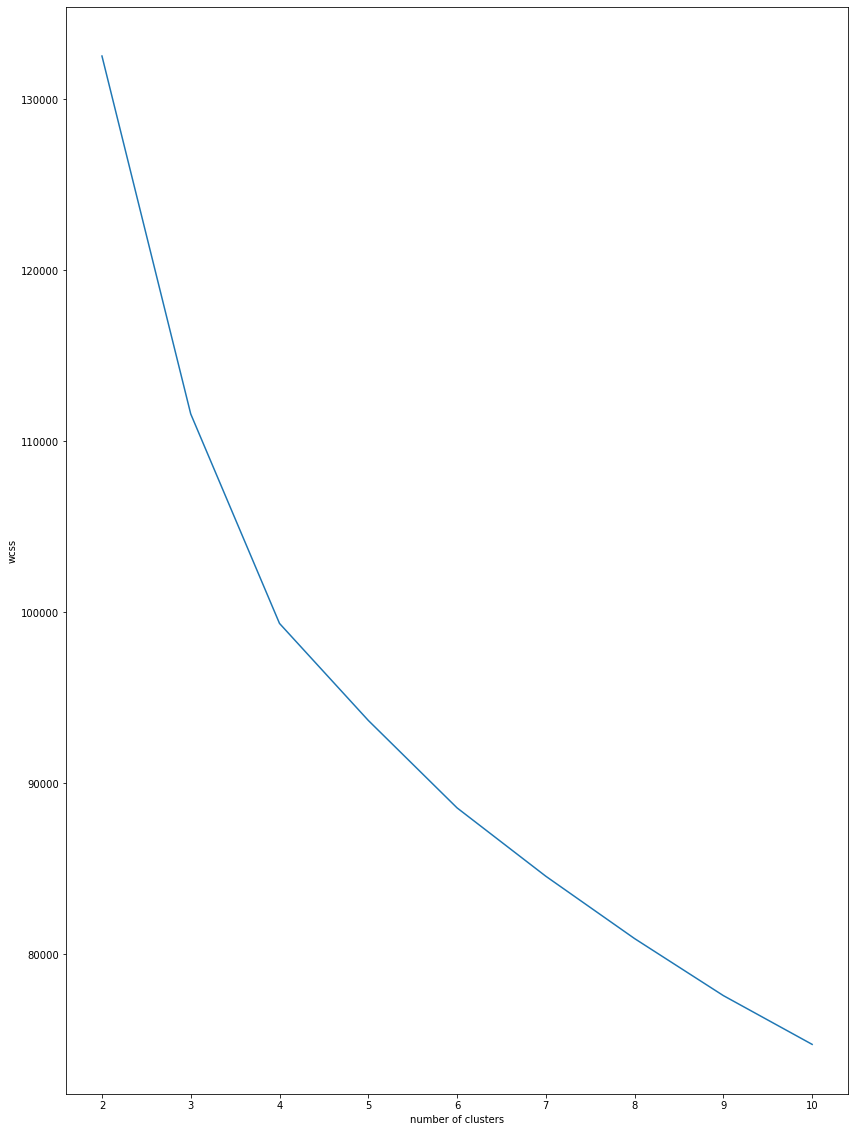

In [44]:
plt.plot(n_clus,wcss)      # Optimal number of clusters is 4 due to bending at cluster number 3
plt.xlabel('number of clusters')
plt.ylabel('wcss')

In [46]:
model=KMeans()
kelbow_viz=KElbowVisualizer(model,k=10)

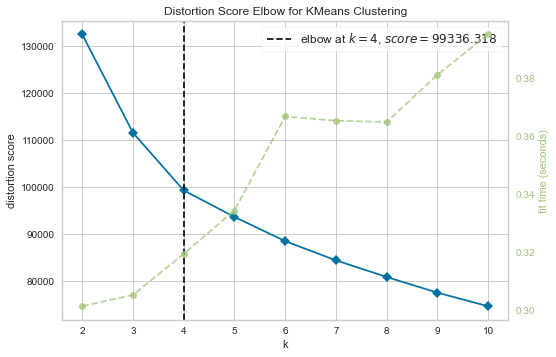

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
kelbow_viz.fit(final_data)
kelbow_viz.show()

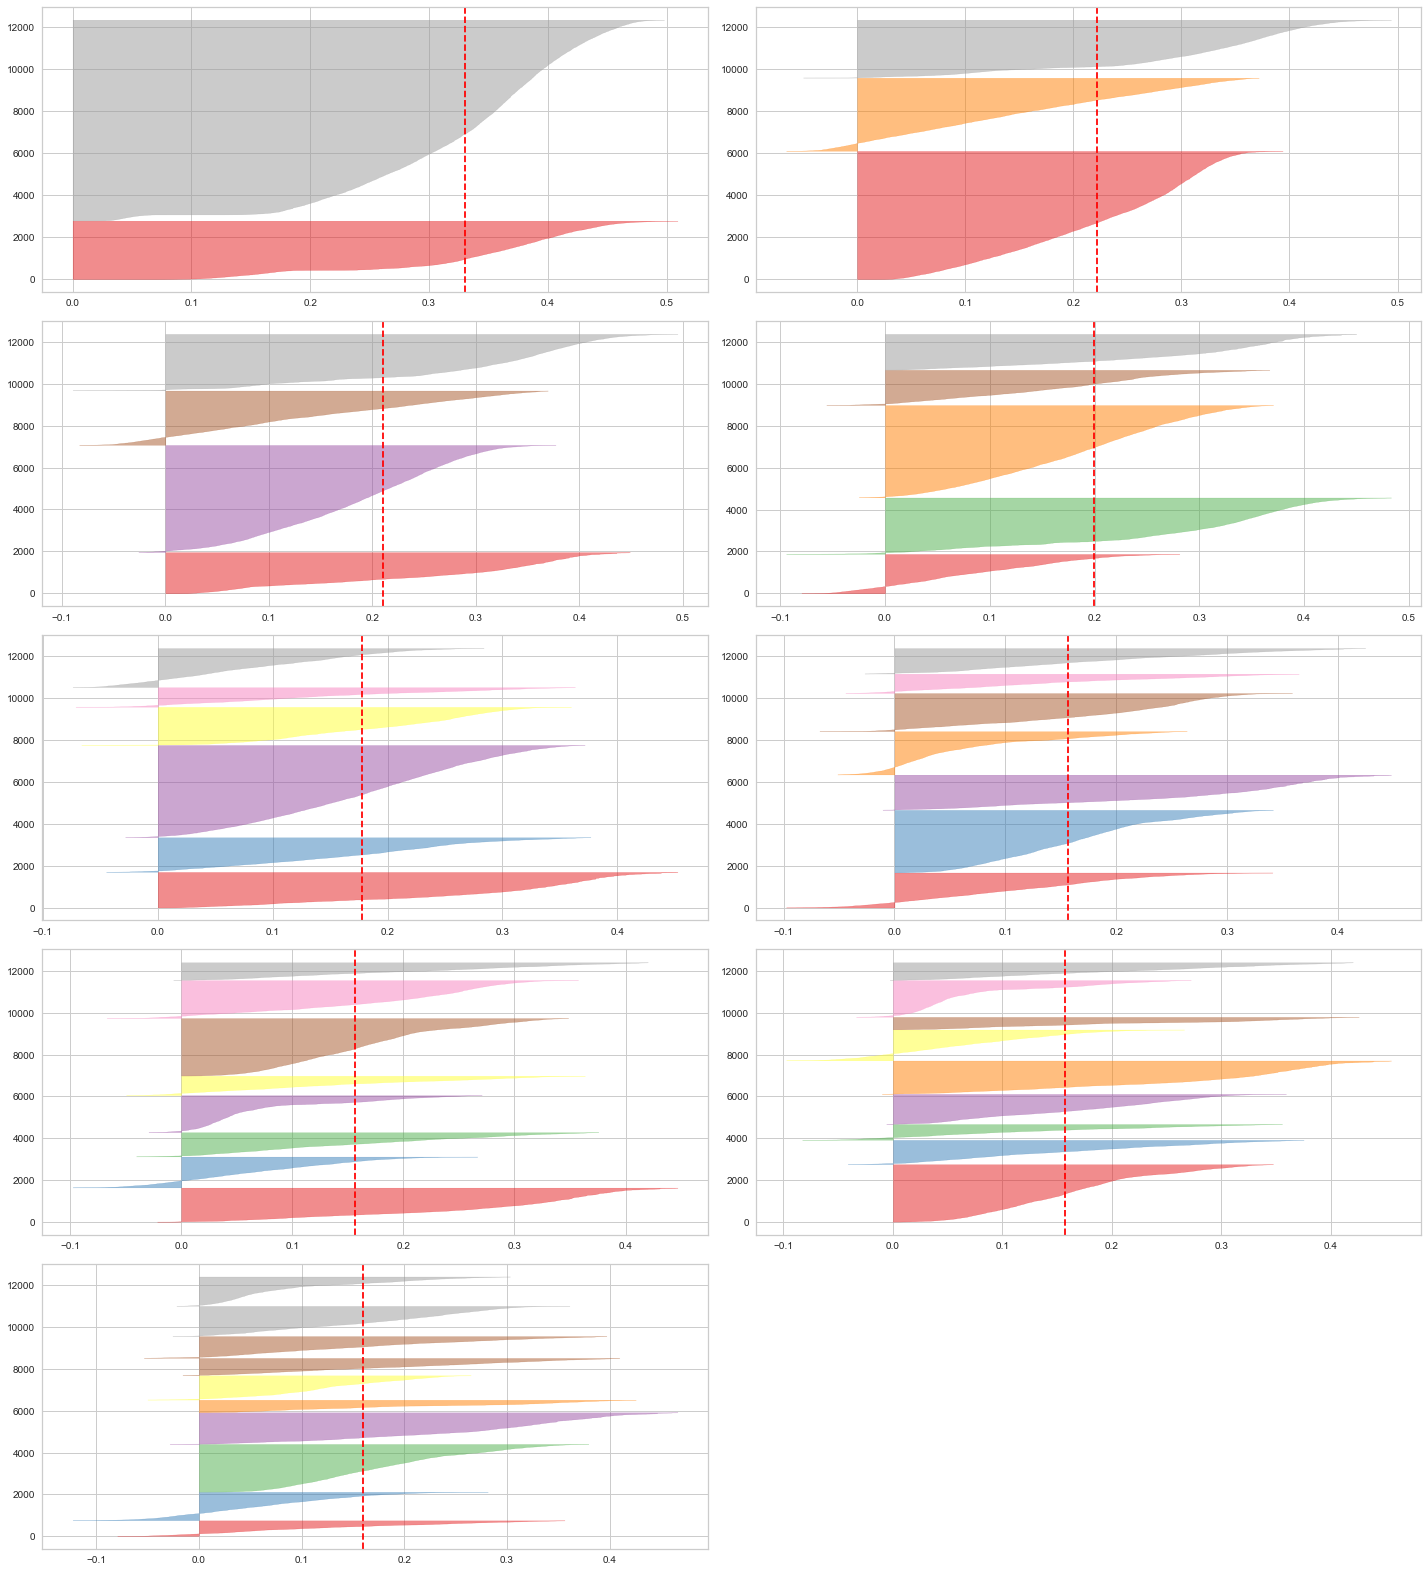

In [48]:
plt.rcParams['figure.figsize']=[20,22]
p=1
for i in n_clus:
    plt.subplot(5,2,p)
    model=KMeans(n_clusters=i,random_state=10)
    sil_viz=SilhouetteVisualizer(estimator=model)
    sil_viz.fit(final_data)
    p+=1
plt.tight_layout()
plt.show()

In [49]:
model_f=KMeans(n_clusters=4,random_state=10)

In [50]:
df['Pred_KM']=model_f.fit_predict(final_data)

In [51]:
df['Pred_KM'].value_counts()

1    5098
3    2691
2    2584
0    1957
Name: Pred_KM, dtype: int64

In [52]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Pred_KM
0,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,Feb,1.0,2,1.0,1,Returning_Visitor,False,False,3
1,0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2.0,2,1.0,2,Returning_Visitor,False,False,3
2,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,Feb,4.0,2,8.5,3,Returning_Visitor,False,False,3
3,0,0.0,0,0.0,2.0,2.666667,0.042031,0.103571,0.0,0.0,Feb,3.0,2,2.0,4,Returning_Visitor,False,False,3
4,0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3.0,2,1.0,4,Returning_Visitor,True,False,3


In [53]:
clust=model_f.cluster_centers_

In [54]:
clust

array([[ 5.95401124e+00,  1.95401124e+00, -6.51903033e-01,
        -6.09545337e-01,  0.00000000e+00,  0.00000000e+00,
        -7.36346165e-01, -6.96107641e-01,  1.64736997e+00,
         1.68047454e+00,  0.00000000e+00,  0.00000000e+00,
         6.69020727e-02,  0.00000000e+00, -5.77413330e-02,
         1.82564652e-01,  1.75268268e-01],
       [ 6.26559435e+00,  1.60102001e+00, -3.18354261e-01,
        -3.04147034e-01,  0.00000000e+00,  0.00000000e+00,
        -3.12082023e-01, -3.08607028e-01, -4.50594895e-01,
        -3.45301529e-01,  0.00000000e+00,  0.00000000e+00,
        -3.08245578e-02,  0.00000000e+00,  9.11982506e-03,
         1.42244800e-02,  2.52451942e-01],
       [ 6.55611455e+00,  1.85797214e+00,  1.14323254e+00,
         1.07565279e+00,  0.00000000e+00,  0.00000000e+00,
         1.23040728e+00,  1.20261180e+00, -3.12872694e-01,
        -5.63019866e-01,  0.00000000e+00,  0.00000000e+00,
         3.33698289e-03,  0.00000000e+00, -5.13641566e-02,
        -4.19044487e-02,  2.5

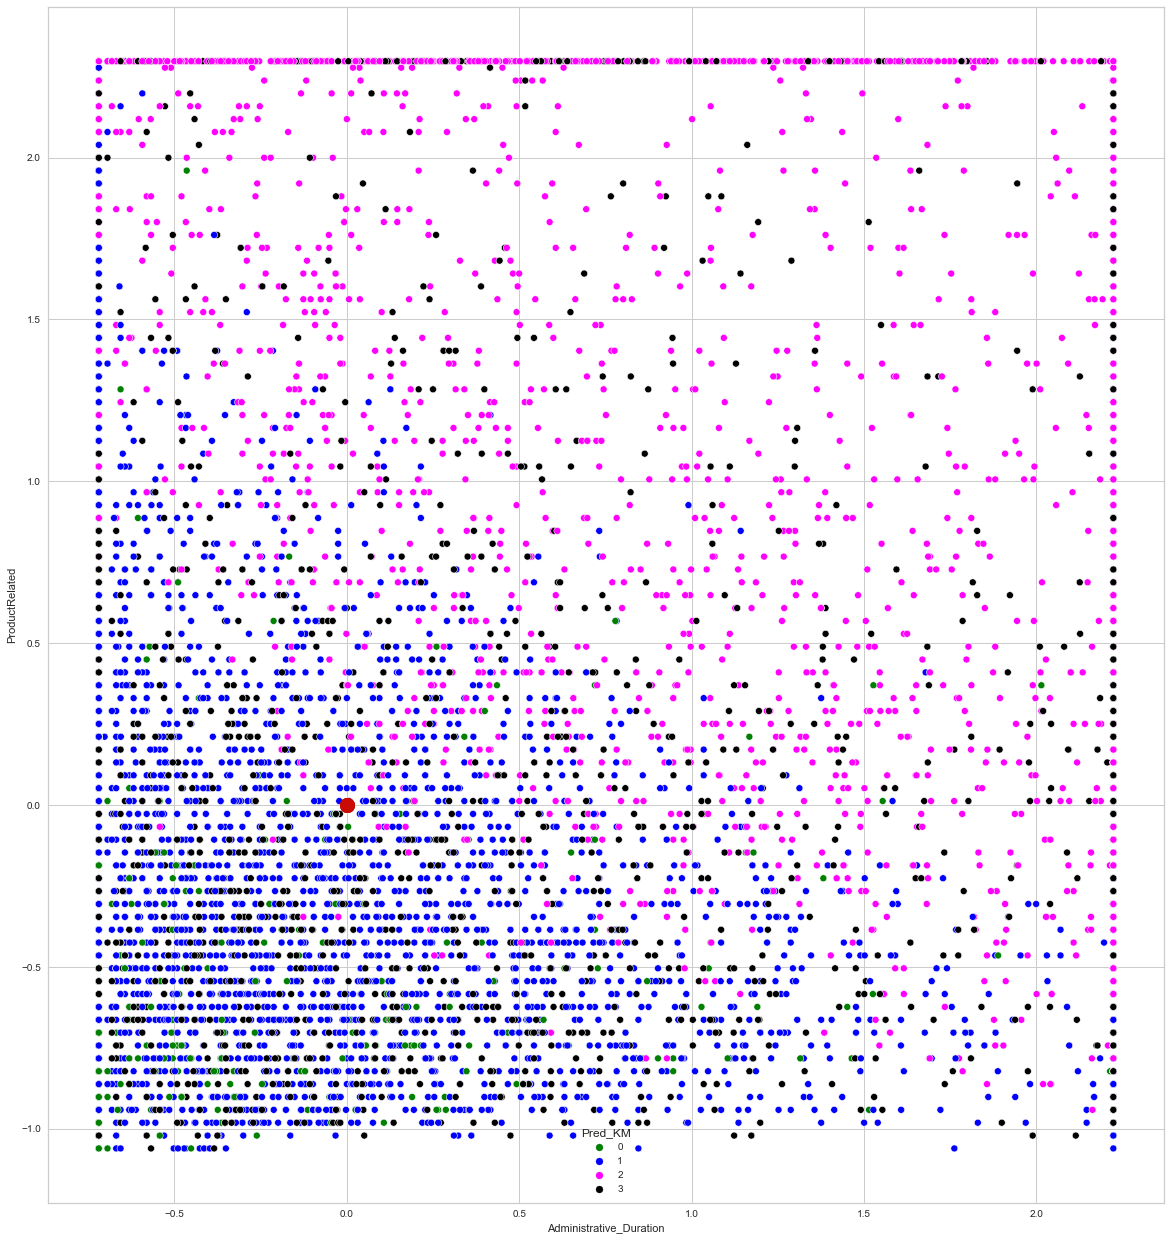

In [72]:
sns.scatterplot(x='Administrative_Duration',y='ProductRelated',hue=df['Pred_KM'],data=final_data,palette=['green','blue','magenta','black'])
plt.plot(clust[0][4],clust[0][4],marker='o',color='r',ms=15)
plt.plot(clust[1][4],clust[1][4],marker='o',color='r',ms=15)
plt.plot(clust[2][4],clust[2][4],marker='o',color='r',ms=15)
plt.plot(clust[3][4],clust[3][4],marker='o',color='r',ms=15)

## Individual Cluster Center Visualization

In [73]:
final_data['Pred_KM']=df['Pred_KM']

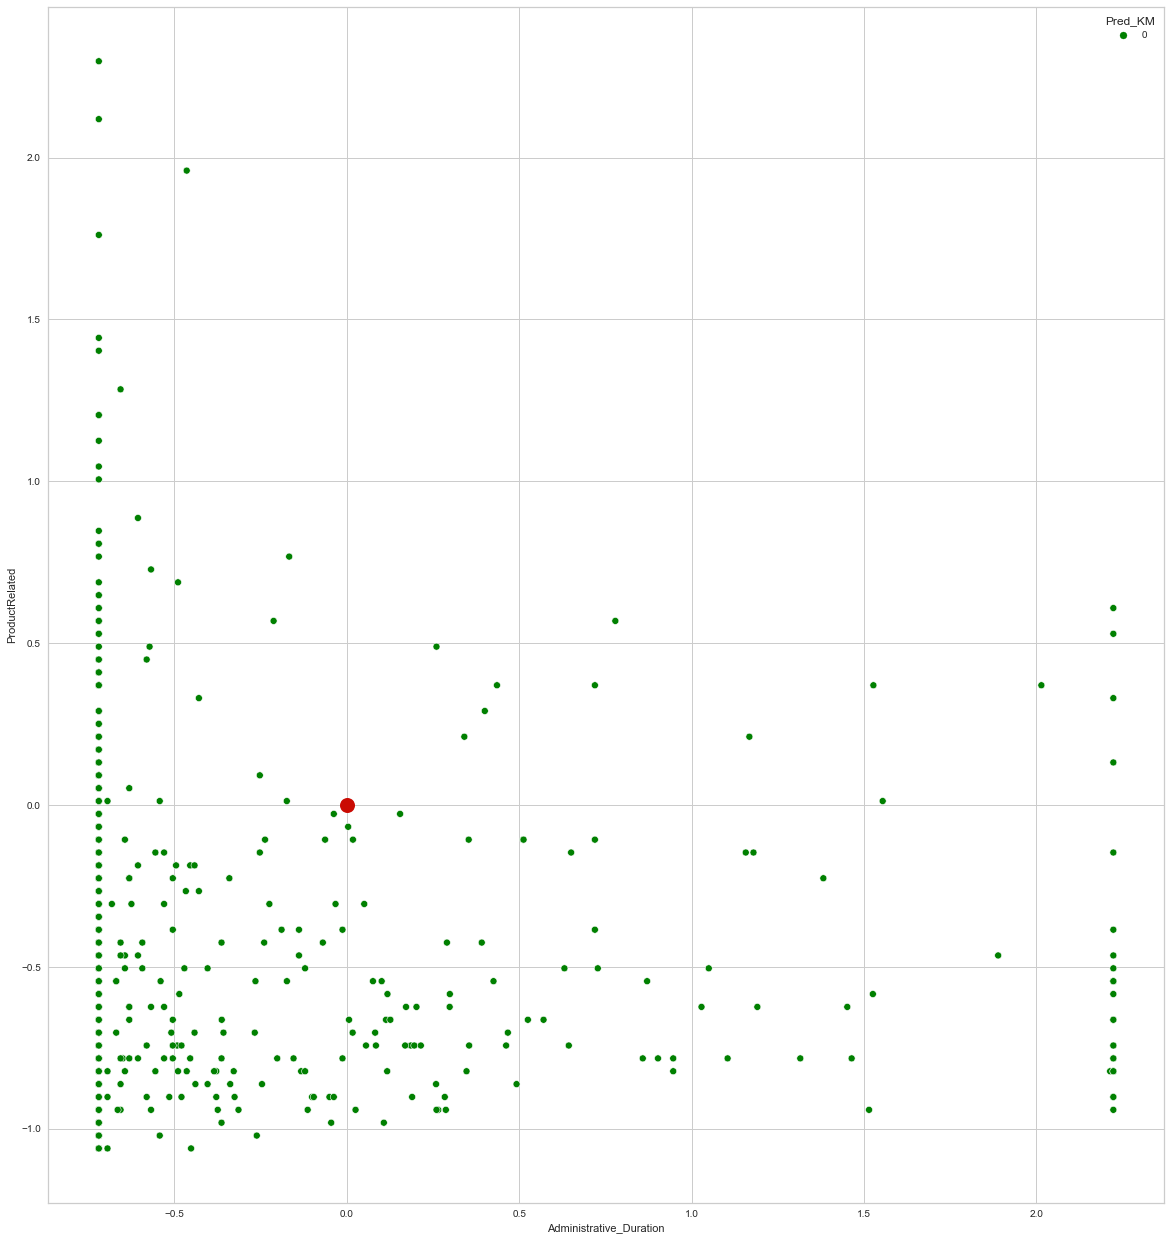

In [74]:
sns.scatterplot(x='Administrative_Duration',y='ProductRelated',hue='Pred_KM',data=final_data[final_data['Pred_KM']==0],palette=['green'])
plt.plot(clust[0][4],clust[0][4],marker='o',color='r',ms=15)

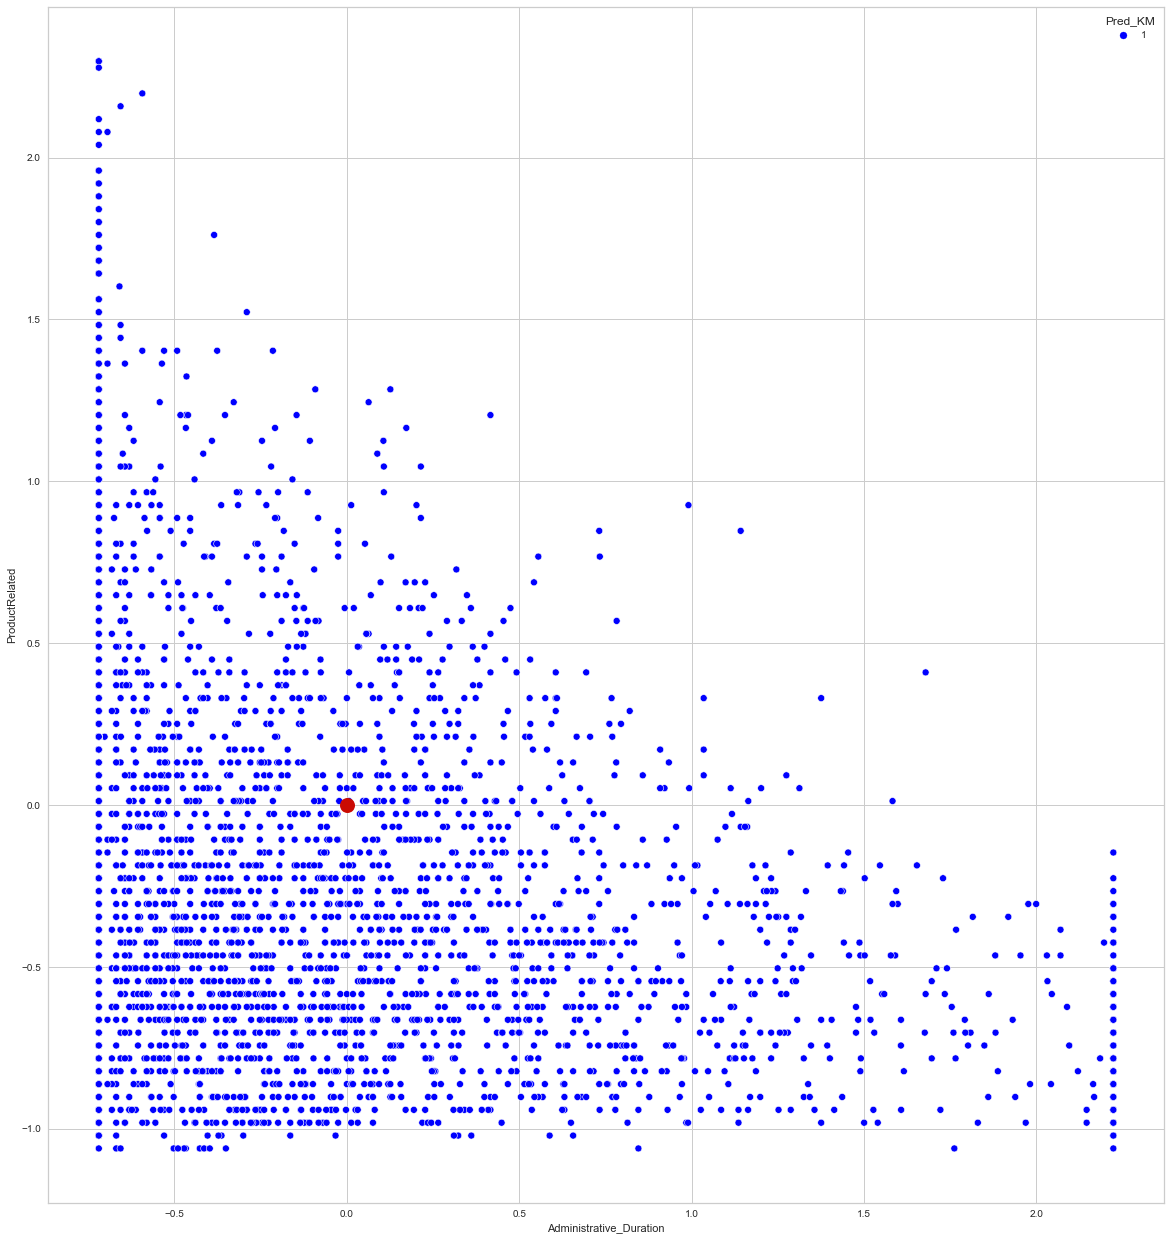

In [75]:
sns.scatterplot(x='Administrative_Duration',y='ProductRelated',hue='Pred_KM',data=final_data[final_data['Pred_KM']==1],palette=['blue'])
plt.plot(clust[1][4],clust[1][4],marker='o',color='r',ms=15)

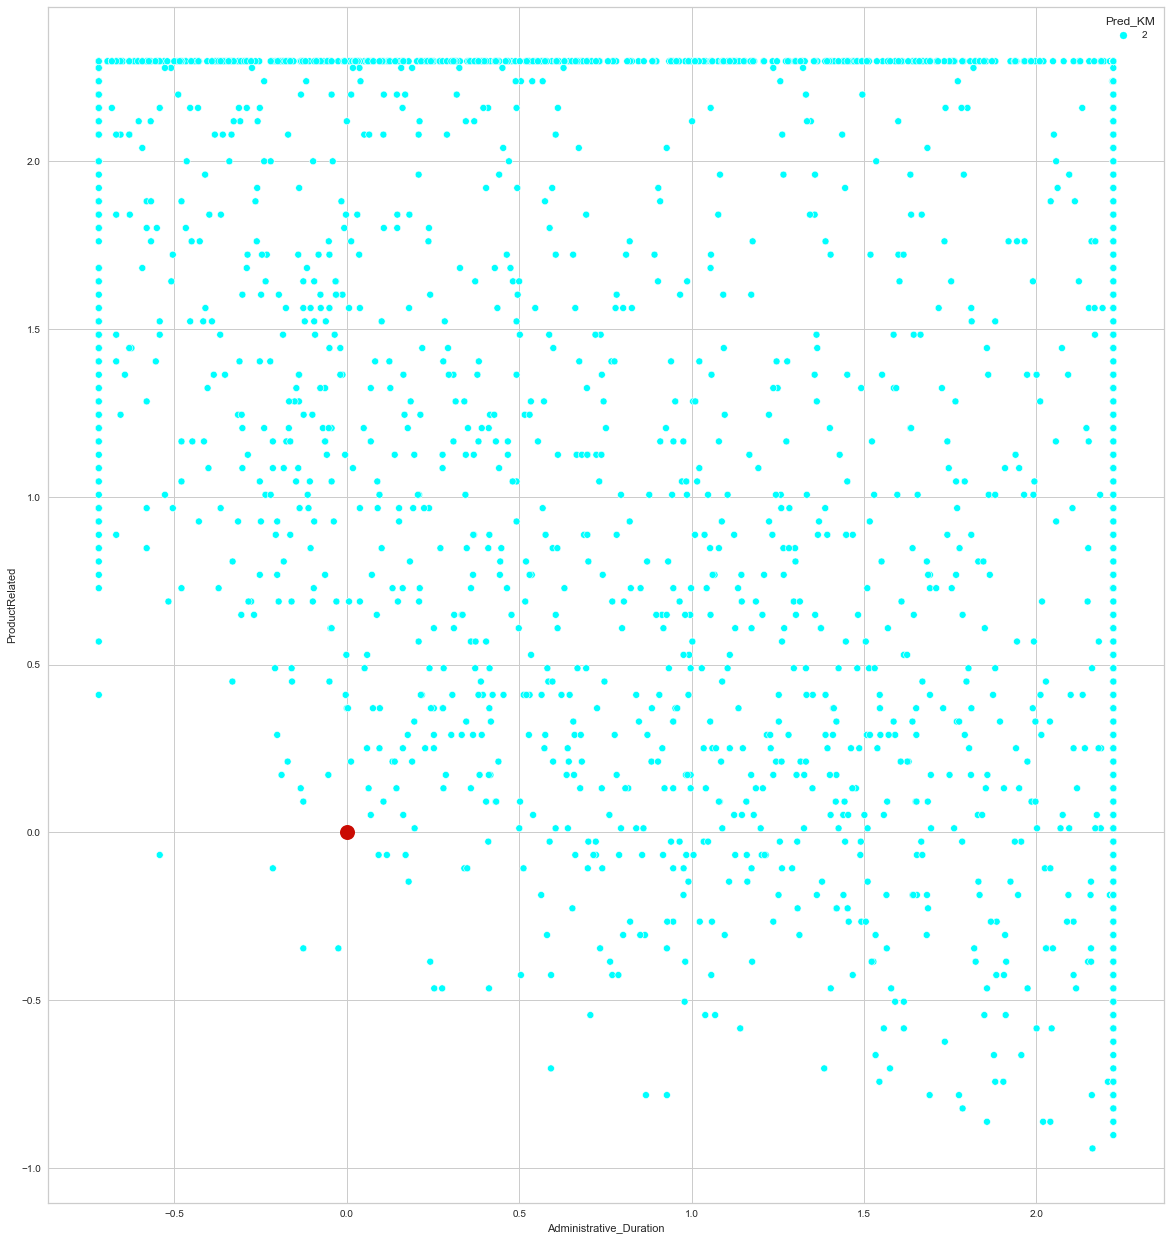

In [76]:
sns.scatterplot(x='Administrative_Duration',y='ProductRelated',hue='Pred_KM',data=final_data[final_data['Pred_KM']==2],palette=['cyan'])
plt.plot(clust[2][4],clust[2][4],marker='o',color='r',ms=15)

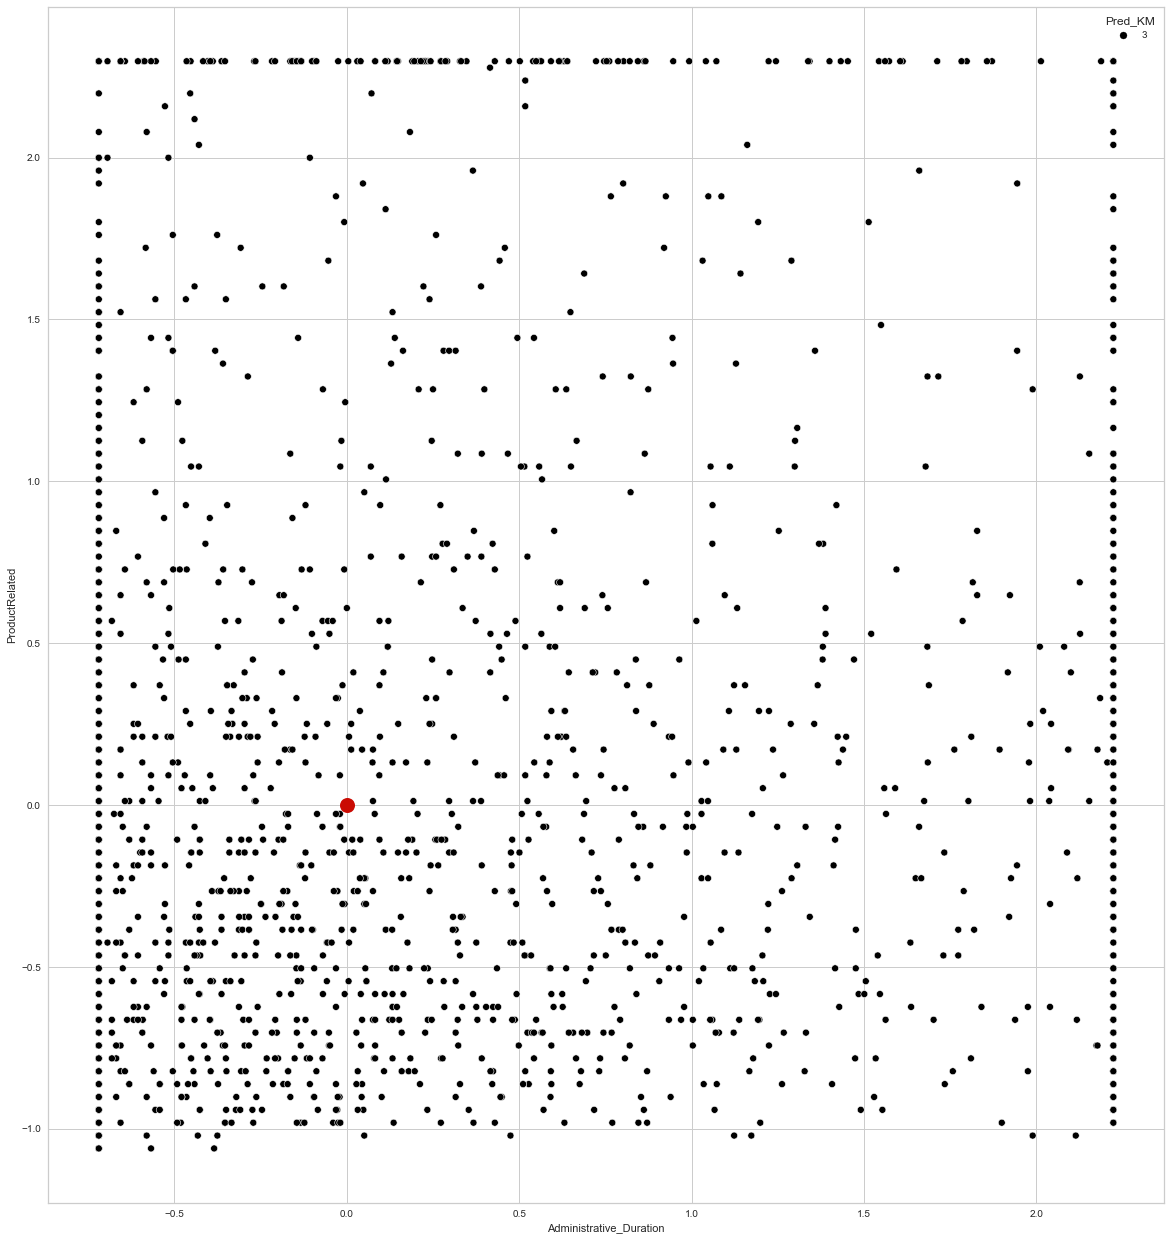

In [77]:
sns.scatterplot(x='Administrative_Duration',y='ProductRelated',hue='Pred_KM',data=final_data[final_data['Pred_KM']==3],palette=['black'])
plt.plot(clust[3][4],clust[3][4],marker='o',color='r',ms=15)

## Agglomerative Clustering

In [78]:
from sklearn.cluster import AgglomerativeClustering

In [79]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [80]:
del final_data['Pred_KM']

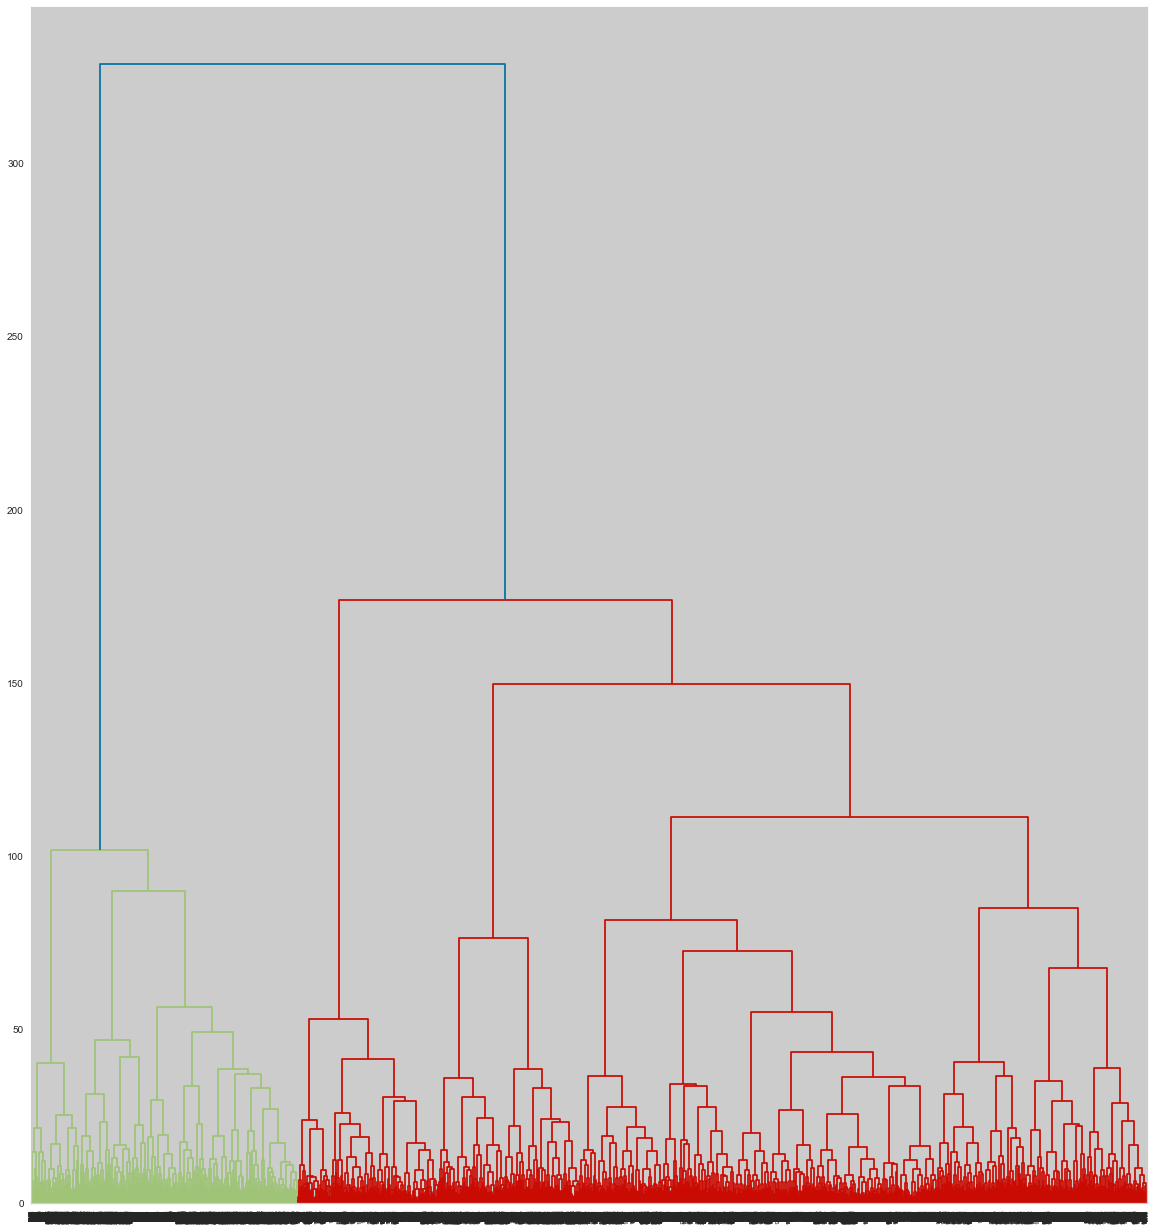

In [81]:
dist_points=linkage(final_data,method='ward')

dend=dendrogram(dist_points)
plt.show()

In [82]:
n_clus

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [83]:
sil_sc=[]
for i in n_clus:
    model=AgglomerativeClustering(n_clusters=i)
    pred=model.fit_predict(final_data)
    sil_sc.append(silhouette_score(final_data,pred))

In [84]:
pd.DataFrame({'Silhouette Score':sil_sc},index=n_clus)

,Silhouette Score
2,0.315036
3,0.192070
4,0.171443
5,0.153644
6,0.137768
7,0.134658
8,0.131795
9,0.124197
10,0.123662


In [85]:
model_f=AgglomerativeClustering(n_clusters=2)
df['Pred_Agglo']=model_f.fit_predict(final_data)

In [86]:
df['Pred_Agglo'].value_counts()

0    9377
1    2953
Name: Pred_Agglo, dtype: int64

<AxesSubplot:xlabel='Administrative_Duration', ylabel='ProductRelated'>

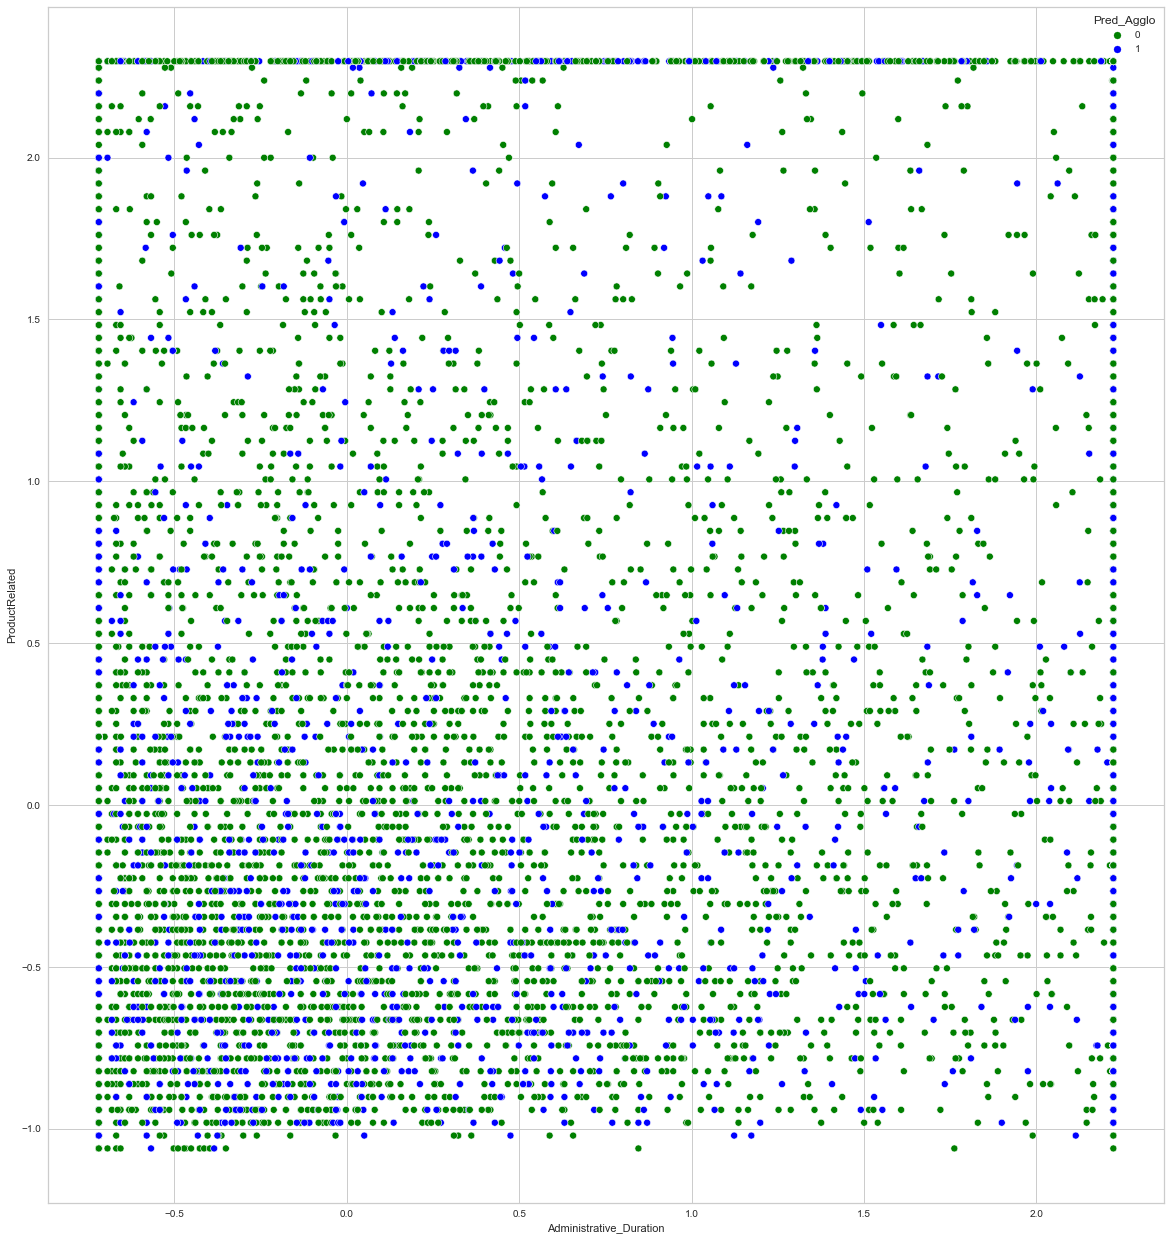

In [89]:
sns.scatterplot(x='Administrative_Duration',y='ProductRelated',hue=df['Pred_Agglo'],data=final_data,palette=['green','blue'])
                                                                    

## DBSCAN

In [90]:
from sklearn.cluster import DBSCAN

## K-Distance Plot

In [91]:
from sklearn.neighbors import NearestNeighbors

In [92]:
nn=NearestNeighbors(n_neighbors=2)
nn_model=nn.fit(final_data)

In [93]:
distance,index=nn_model.kneighbors(final_data)

In [94]:
distance=np.sort(distance,axis=0)

Text(0.5, 0, 'Sorted Distance')

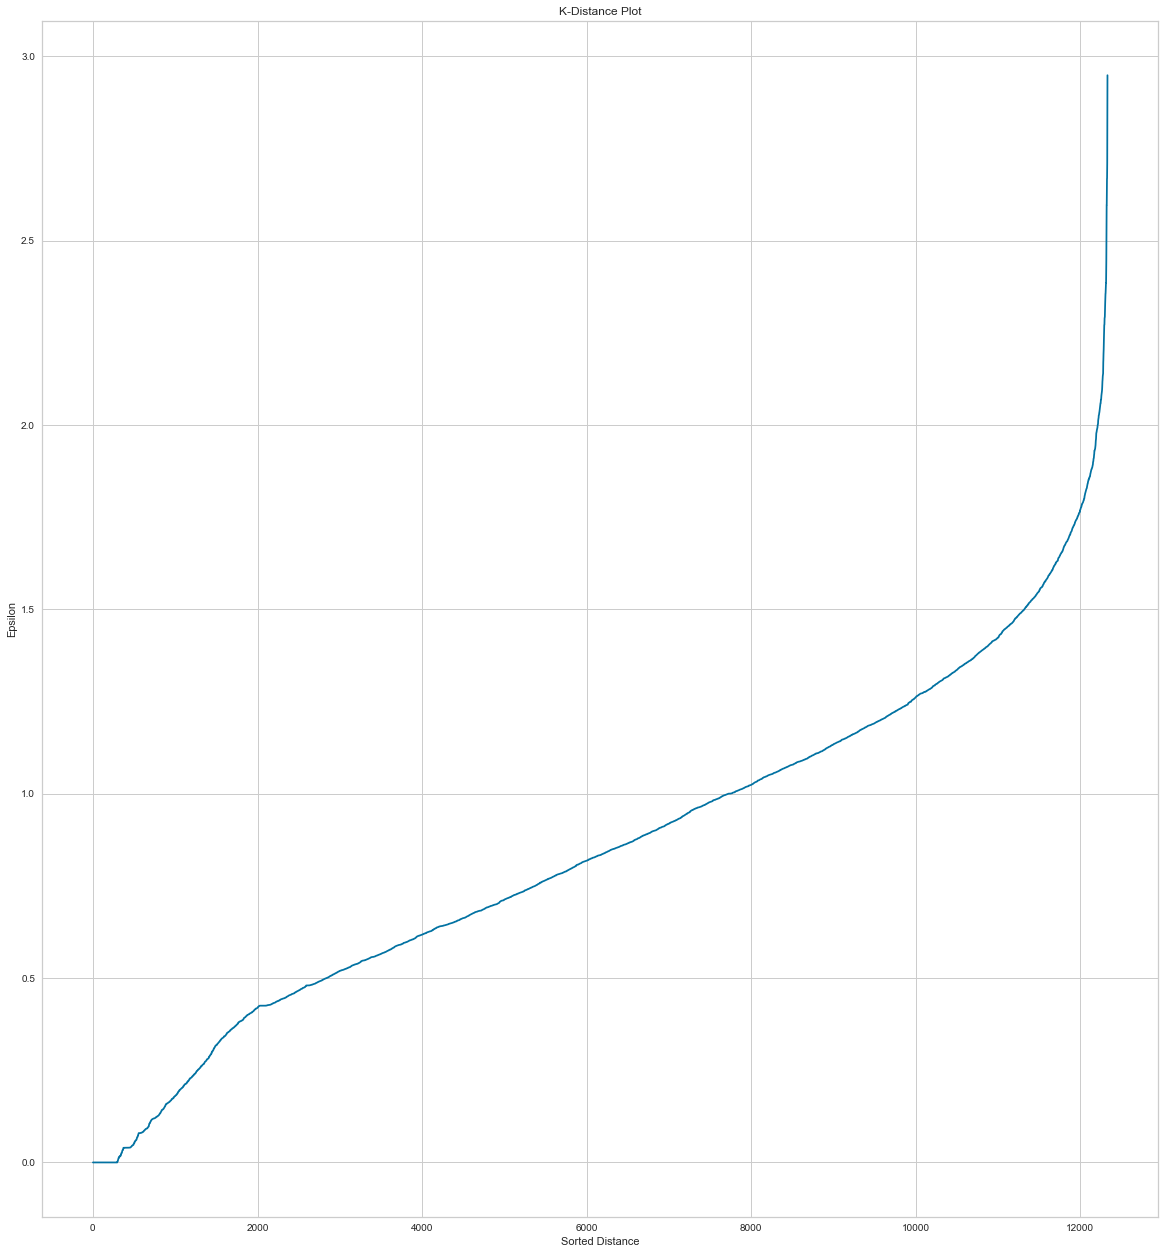

In [95]:
plt.plot(distance[:,1])      
plt.title('K-Distance Plot')
plt.ylabel('Epsilon')
plt.xlabel('Sorted Distance')

In [97]:
sil_score=[]
for i in range(18,34):
    model=DBSCAN(eps=2.0,min_samples=i)
    pred=model.fit_predict(final_data)
    sil_score.append(silhouette_score(final_data,pred))
    
pd.DataFrame({'Silhouette Score':sil_score},index=range(18,34))

,Silhouette Score
18,0.131507
19,0.130713
20,0.129389
21,0.128888
22,0.127812
23,0.126206
24,0.126259
25,0.126840
26,0.127227
27,0.126607


In [99]:
sil_score=[]
for i in range(18,34):
    model=DBSCAN(eps=2.2,min_samples=i)
    pred=model.fit_predict(final_data)
    sil_score.append(silhouette_score(final_data,pred))
    
pd.DataFrame({'Silhouette Score':sil_score},index=range(18,34))

,Silhouette Score
18,0.180360
19,0.182846
20,0.183347
21,0.185274
22,0.185703
23,0.184315
24,0.183441
25,0.184274
26,0.182984
27,0.181864


In [100]:
model_f=DBSCAN(eps=2.2,min_samples=22)
df['Pred_DBS']=model_f.fit_predict(final_data)

In [101]:
df['Pred_DBS'].value_counts()

 0    12087
-1      243
Name: Pred_DBS, dtype: int64

<AxesSubplot:xlabel='Administrative_Duration', ylabel='ProductRelated'>

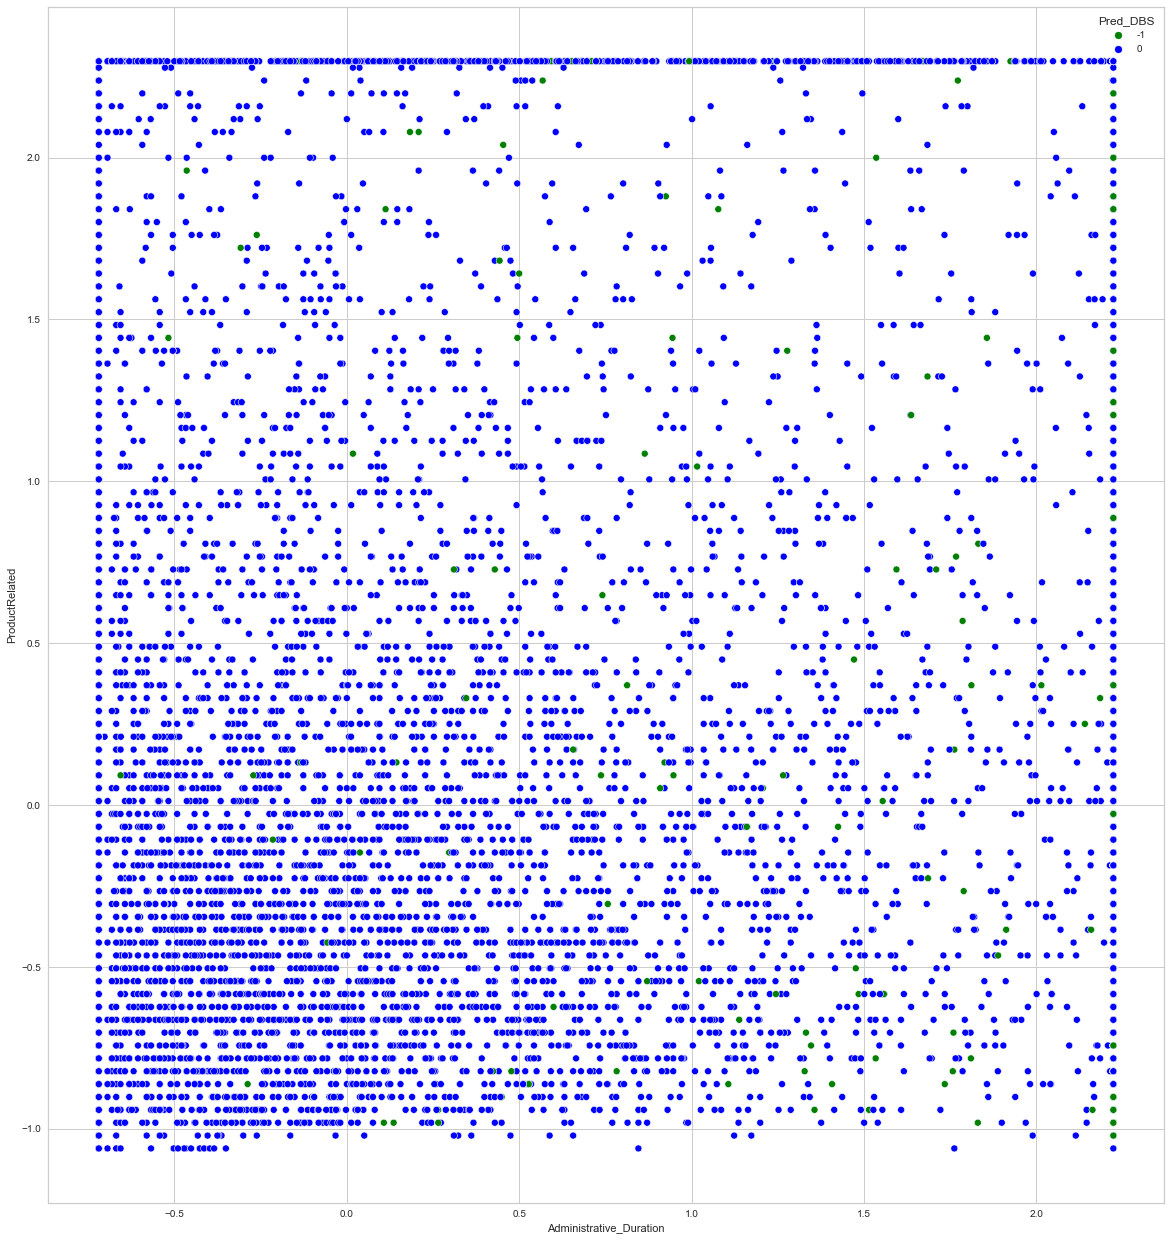

In [102]:
sns.scatterplot(x='Administrative_Duration',y='ProductRelated',hue=df['Pred_DBS'],data=final_data,palette=['green','blue'])

## PCA

In [103]:
from sklearn.decomposition import PCA

In [105]:
pca=PCA(n_components=17)

In [106]:
df_pca=pca.fit_transform(final_data)

In [107]:
df_pca=pd.DataFrame(df_pca,columns=range(1,18))

In [108]:
df_pca

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,3.475463,-2.630022,1.418915,-1.454678,-1.754852,-0.132915,-0.068274,0.213728,0.060997,-0.044510,-0.130145,0.016226,-1.235205e-16,-1.349354e-17,-2.284861e-17,2.880517e-20,-5.641228e-34
1,3.391293,-1.662532,-0.151898,-0.694778,-0.439130,-0.644317,0.530455,-0.579926,1.710388,-0.113531,0.150132,0.295242,-4.049483e-17,-2.305951e-18,-8.498125e-18,4.837078e-20,-1.993034e-34
2,3.512202,-2.702899,1.861528,1.804822,1.117334,2.068086,1.235530,0.138711,0.119835,-0.086361,-0.131068,0.047492,-6.273367e-17,-6.378436e-18,-1.092784e-17,1.573221e-20,-2.754612e-34
3,3.445930,-2.708996,1.935740,0.580187,0.173457,-0.513818,0.591912,0.151664,0.109825,-0.056492,-0.138572,0.051602,-1.616865e-17,-1.572435e-18,-2.569210e-18,9.359969e-21,-6.478109e-35
4,3.271705,-1.096667,0.471316,0.176142,0.878805,-1.075836,0.570150,-0.125555,-0.301883,0.235321,0.719110,-0.272934,8.235847e-15,-1.051506e-15,-1.329589e-16,3.967899e-19,9.580416e-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.963507,2.039300,1.114406,0.048174,1.112533,-0.653811,2.244478,-0.057288,0.002184,0.606019,0.753083,0.412888,-5.643986e-18,3.824277e-20,3.118592e-19,1.345167e-20,1.864976e-36
12326,-1.780901,-1.068513,-0.961434,1.061796,1.424800,-1.697412,-0.139909,-0.627090,-0.167182,0.254048,0.678144,-0.314046,-4.247847e-18,4.454796e-19,2.343982e-19,6.184618e-21,3.605289e-36
12327,-1.614972,-2.970808,1.774422,1.158795,0.626778,-1.356153,-0.194269,0.165868,-0.391109,0.114257,0.722335,-0.094619,-4.349498e-18,1.878514e-19,5.842458e-19,-5.007318e-22,8.876996e-36
12328,-1.889066,0.017789,-0.740413,1.467988,-0.089799,-0.862165,-0.922404,-0.784884,0.002549,-0.324761,-0.226460,-0.068126,1.161867e-18,-8.042004e-20,-8.923347e-20,1.456424e-21,-9.658913e-37


In [109]:
var=pca.explained_variance_ratio_

In [110]:
var

array([3.70534039e-01, 2.06585978e-01, 8.54395616e-02, 7.37833426e-02,
       7.04479398e-02, 6.42659393e-02, 5.70459885e-02, 2.55457458e-02,
       1.39653272e-02, 1.23605559e-02, 1.15351394e-02, 8.49044308e-03,
       3.89032925e-34, 8.93264057e-35, 1.27060858e-35, 8.31849447e-39,
       6.15403434e-69])

In [113]:
add=0
for i in range(17):
    add=add+var[i]
    print('Total Variance upto PC%s is %.2f'%(i+1,add))

Total Variance upto PC1 is 0.37
Total Variance upto PC2 is 0.58
Total Variance upto PC3 is 0.66
Total Variance upto PC4 is 0.74
Total Variance upto PC5 is 0.81
Total Variance upto PC6 is 0.87
Total Variance upto PC7 is 0.93
Total Variance upto PC8 is 0.95
Total Variance upto PC9 is 0.97
Total Variance upto PC10 is 0.98
Total Variance upto PC11 is 0.99
Total Variance upto PC12 is 1.00
Total Variance upto PC13 is 1.00
Total Variance upto PC14 is 1.00
Total Variance upto PC15 is 1.00
Total Variance upto PC16 is 1.00
Total Variance upto PC17 is 1.00


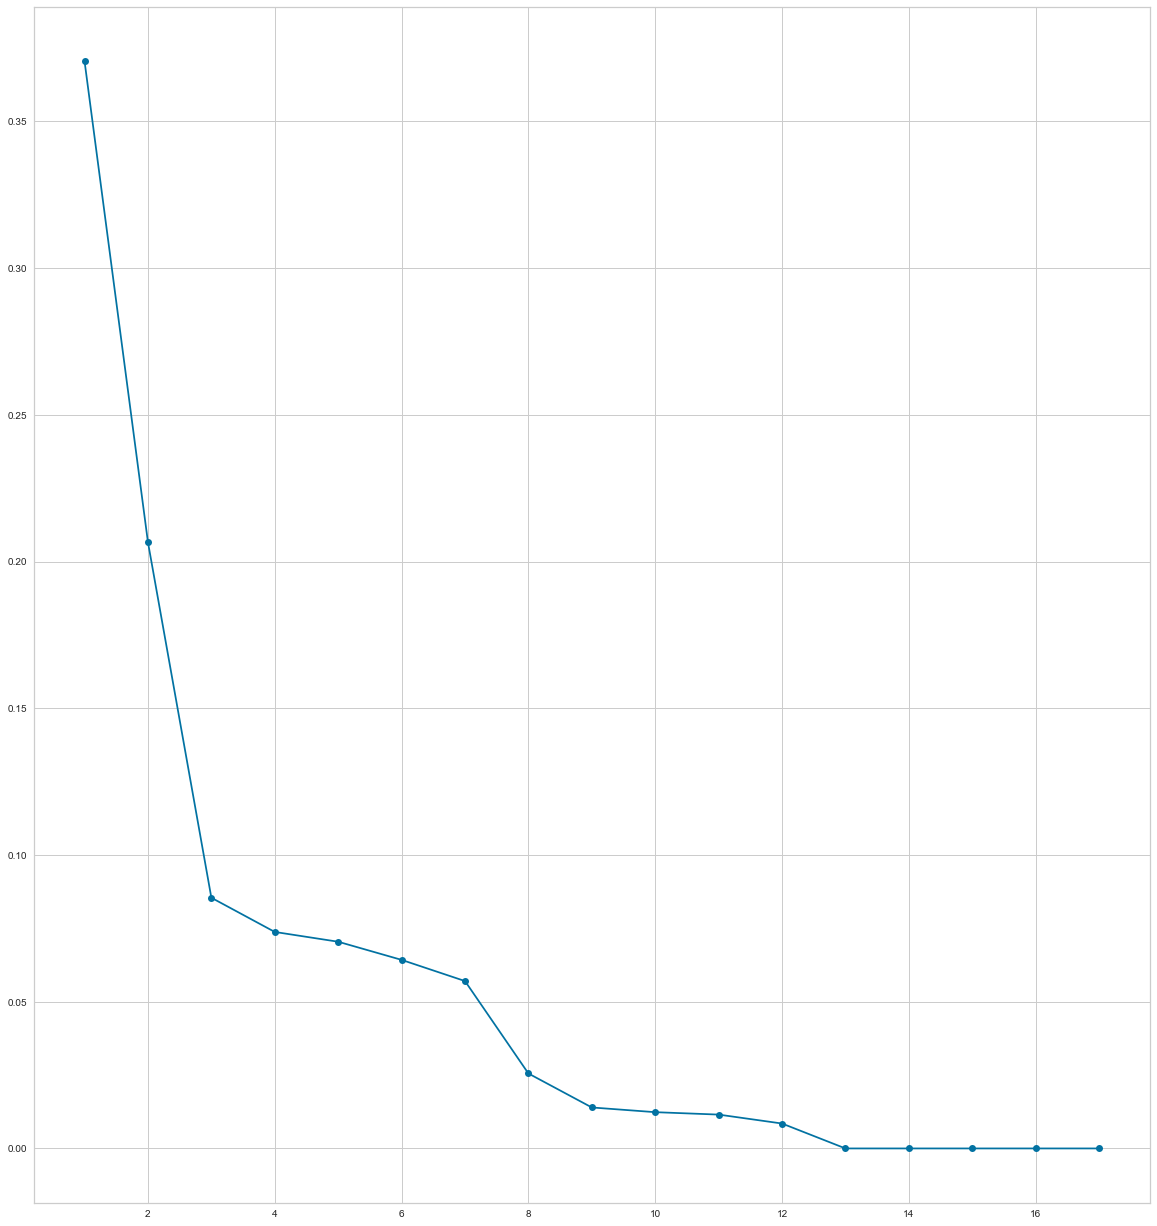

In [114]:
plt.plot(np.arange(1,18),var,marker='o')